# Research Progress Meeting 2020-04-02

![Keystone spill 2019](../resources/keystone_1.jpg)

Image:Keystone pipeline leak on Oct 29, 2019. https://www.rawstory.com/2019/11/it-happens-over-and-over-and-over-and-over-keystone-pipeline-leaks-at-least-383000-gallons-of-crude-oil-in-north-dakota/

In [1]:
library(oildata)
library(tidyverse)
library(ggmap)

maps_key <- readChar("../../maps_key.txt", file.info("../../maps_key.txt")$size)
register_google(maps_key)

head(select(incidents_2010, -narrative))

── Attaching packages ─────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


DATAFILE_AS_OF,significant,serious,ipe,integrity_assessment_target,operations_maintenance_target,incident_ID,SUPPLEMENTAL_NUMBER,REPORT_RECEIVED_DATE,REPORT_TYPE,⋯,PREPARER_TITLE,PREPARER_EMAIL,PREPARER_TELEPHONE,PREPARER_FAX,PREPARED_DATE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,date
<dttm>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<date>
2020-01-30 04:18:51,FALSE,FALSE,NO,NO,NO,20100001,15751,2010-03-10 08:05:46,SUPPLEMENTAL FINAL,⋯,SENIOR COMPLIANCE COORDINATOR,ken.lybarger@magellanlp.com,918-574-7315,918-574-7246,2011-04-14 20:00:00,KENNETH L. LYBARGER,SENIOR COMPLIANCE COORDINATOR,918-574-7315,ken.lybarger@magellanlp.com,2010-02-16
2020-01-30 04:18:51,FALSE,FALSE,NO,NO,NO,20100002,19837,2010-03-16 13:43:54,SUPPLEMENTAL FINAL,⋯,SR. PIPELINE TECH II,gabe.mccown@chaparralenergy.com,405-426-4361,NA,2014-10-27 20:00:00,DAVE YEAGER,PIPELINE MANAGER,405-255-6581,dave.yeager@chaparralenergy.com,2010-03-01
2020-01-30 04:18:51,TRUE,FALSE,NO,NO,NO,20100003,18021,2010-03-17 06:38:15,SUPPLEMENTAL FINAL,⋯,DIRECTOR - REGULATORY COMPLIANCE,danny.nichols@energytransfer.com,326-681-006,NA,2013-05-09 20:00:00,DANNY NICHOLS,DIRECTOR - REGULATORY COMPLIANCE,326-681-006,danny.nichols@energytransfer.com,2010-02-22
2020-01-30 04:18:51,FALSE,FALSE,NO,NO,NO,20100004,19086,2010-03-18 09:18:48,SUPPLEMENTAL FINAL,⋯,COMPLIANCE MANAGER,jreinbold@buckeye.com,610-904-4185,610-904-4545,2014-03-05 19:00:00,JOHN REINBOLD,COMPLIANCE MANAGER,610-904-4185,jreinbold@buckeye.com,2010-02-19
2020-01-30 04:18:51,FALSE,FALSE,NO,NO,NO,20100005,17663,2010-03-18 10:26:48,SUPPLEMENTAL FINAL,⋯,ENVIRONMENTAL REMEDIATION AND COMPLIANCE SPECIALIS,hltuggle@paalp.com,713-646-4324,713-646-4310,2013-03-21 20:00:00,WARREN FUSILIER,DIRECTOR - ENVIRONMENTAL AND REMEDIATION-COMPLIANC,713-646-4515,wdfusilier@paalp.com,2010-02-21
2020-01-30 04:18:51,FALSE,FALSE,NO,NO,NO,20100006,17891,2010-03-19 10:48:18,SUPPLEMENTAL FINAL,⋯,DOT COORDINATOR,michael.j.donally@conocophillips.com,406-855-6963,406-543-5669,2013-04-10 20:00:00,TODD L. TULLIO,REGULATORY COMPLIANCE MGR,832-379-6255,todd.l.tullio@conocophillips.com,2010-02-22


In [2]:
packageVersion("oildata")

[1] ‘1.1.5’

![Leak detection](resources/keystone_1.png)
![Leak detection 2](resources/keystone_2.png)

*Source: Draft Environmental Impact Assessment, DNV Consulting 2006.*

![Expected spill frequency](resources/keystone_3.png)

*Source: Draft Environmnental Impact Assessment, DNV Consulting 2006.*

---

In other words, the operator expects **one significant spill every 7 years** from the get-go. 

### Let's quickly investigate the reality of keystone.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1a/Keystone-pipeline-route.svg" alt="Keystone map" style="width:50%"> 

In [3]:
oildata::add_company_names(32334)

[1] "Tc Oil Pipeline Operations"

In [4]:
keystone_candidates <- subset(incidents_2010, ID == 32334)
nrow(keystone_candidates)

[1] 21

In [5]:
keystone_candidates$long <- as.numeric(keystone_candidates$long)
keystone_candidates$lat <- as.numeric(keystone_candidates$lat)

In [6]:
# us <- ggmap::get_googlemap("US", zoom = 4)
# saveRDS(us, "us_map.rds")
us <- readRDS("us_map.rds")

keystone_operator_spills <- ggmap(us) +
    geom_point(data = keystone_candidates, aes(x=long, y=lat, size = volume), alpha = 0.5)

options(repr.plot.width=8, repr.plot.height=6)

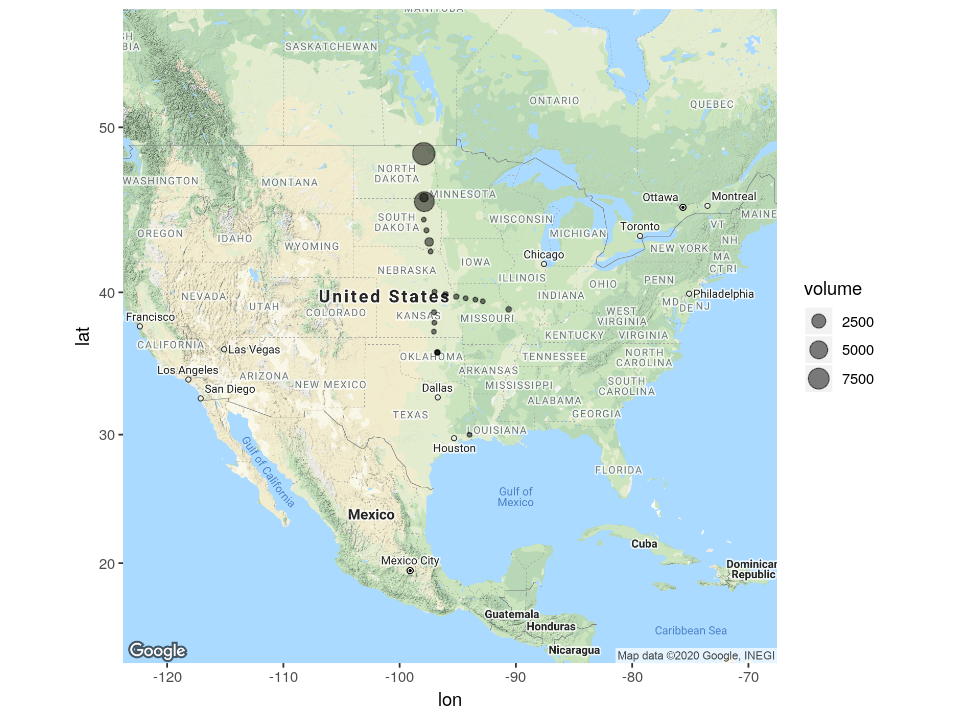

In [7]:
keystone_operator_spills

## What, then, does safe mean?

* Safety has a very specific meaning in the industry.
* There is an expected performance. The environmental impact assessment implies that some incidents are to be expected.
* When leaks occur "that's ok", as long as they are detected fast and addressed.

Maybe I should mention how in the report, incident detection is the focus, rather than prevention. Thus, the incident count still matters? But in a paradox fashion. On the one hand, the incident count increasing is a sign progress - detection works. On the other hand, the incident count not going down is a sign of lack of progress. Now, the new Canadian initaitive toward no incidents might challenge that.

## Plotting the pre-2002 trend

Pre-2000 data on pipeline network available from https://www.bts.gov/archive/publications/national_transportation_statistics/2009/table_01_10

In [8]:
pre <- readxl::read_excel("table_01_10.xls", skip = 1, na = "U", n_max=6)
pre$`...1` <- c("oil_total", "crude", "rpp", "gas_total", "gas_distribution", "hvl")

head(pre)

New names:
* `` -> ...1


...1,1960,1965,1970,1975,1980,1985,1990,1991,1992,⋯,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
oil_total,190944,210867,218671,225889,218393,213605,208752,203828,196545,⋯,178648,177463,176996,158248,160990,159889,163398,162832,162654,166921
crude,141085,149424,146275,145679,129831,117812,118805,115860,110651,⋯,87663,86369,85480,NA,NA,NA,NA,NA,NA,NA
rpp,49859,61443,72396,80210,88562,95793,89947,87968,85894,⋯,90985,91094,91516,NA,NA,NA,NA,NA,NA,NA
gas_total,630900,767500,913300,979300,1051800,1118900,1189200,1218200,1216100,⋯,1351200,1340300,1369300,1373500,1411400,1424200,1462300,1437500,1534300,1520200
gas_distribution,391400,494500,594800,648200,701800,753400,864600,891400,892000,⋯,1022100,1007500,1045600,1066300,1079600,1097900,1139800,1117800,1214000,1201100
hvl,183700,211300,252200,262600,266500,271200,292200,294100,291500,⋯,300100,301000,296600,287100,309500,304000,298900,296400,300400,300000


In [9]:
pre_2000 <- pivot_longer(pre, -`...1`)
colnames(pre_2000) <- c("commodity", "year", "miles")
pre_2000$year <- as.numeric(pre_2000$year)
head(pre_2000)

commodity,year,miles
<chr>,<dbl>,<dbl>
oil_total,1960,190944
oil_total,1965,210867
oil_total,1970,218671
oil_total,1975,225889
oil_total,1980,218393
oil_total,1985,213605


In [10]:
incidents_y <- incidents %>%
    filter(commodity %in% c("crude", "rpp", "hvl")) %>%
    group_by(year, commodity) %>%
    summarize(spill_volume = sum(volume, na.rm = T), 
              net_loss = sum(net_loss, na.rm = T), 
              n_significant = sum(significant, na.rm = T), 
              cost = sum(cost_1984, na.rm = T))

head(incidents_y)

year,commodity,spill_volume,net_loss,n_significant,cost
<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>
1986,crude,115012,22187,106,8670884.0
1986,hvl,19619,2325,5,80009.6
1986,rpp,129259,34749,65,5262288.5
1987,crude,125990,64507,103,3625659.3
1987,hvl,139393,139393,13,406616.8
1987,rpp,77866,57910,83,7534236.0


In [11]:
pre_2000_trends <- left_join(pre_2000, incidents_y, by = c("year", "commodity"))
head(pre_2000_trends)

commodity,year,miles,spill_volume,net_loss,n_significant,cost
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
oil_total,1960,190944,NA,NA,NA,NA
oil_total,1965,210867,NA,NA,NA,NA
oil_total,1970,218671,NA,NA,NA,NA
oil_total,1975,225889,NA,NA,NA,NA
oil_total,1980,218393,NA,NA,NA,NA
oil_total,1985,213605,NA,NA,NA,NA


In [12]:
pre_2000_graphed <- pre_2000_trends %>%
    filter(commodity %in% c("crude", "hvl", "rpp")) %>%
    filter(!is.na(spill_volume & miles) & year < 2001) %>%
    pivot_longer(-c(year, commodity), names_to = "variable") %>%
    filter(variable != "n_significant") %>%
    ggplot(aes(x=year, value)) +
        facet_wrap(commodity ~ variable, scales = "free") +
        geom_line() + 
        geom_point(size = 0.7) +
        geom_smooth(method = "lm", se = F) +
        scale_y_continuous(limits = c(0, NA)) +
        scale_x_continuous(breaks = c(1990, 1992, 1994, 1996, 1998, 2000)) +
        labs(y = NULL)

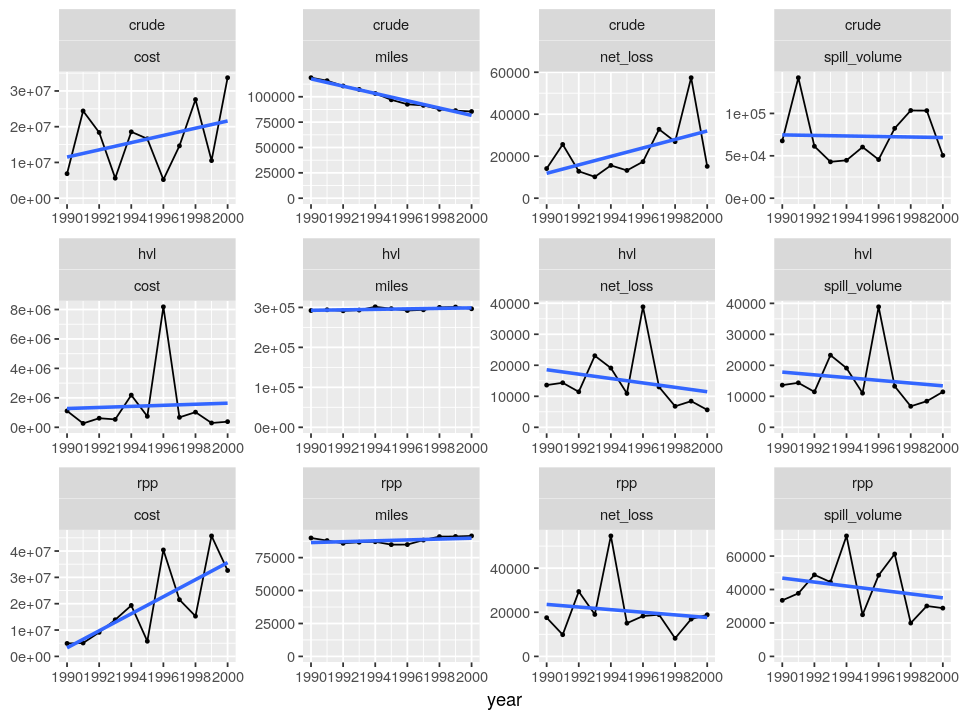

In [13]:
pre_2000_graphed